## Generate Random Data
We will generate some random data to test our algorithm. We will create 200 samples with 50 features and use a true coefficient of 3 for each feature. We will then threshold coefficients to render them non-negative. Lastly, we will add some noise to the samples.
<br>
使用 scikit-learn 套件，實作「非負最小平方法（NNLS）」線性回歸模型，並與傳統的 OLS（普通最小平方法）進行比較分析。

In [1]:
import numpy as np

np.random.seed(42)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 3 * np.random.randn(n_features)
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)
y += 5 * np.random.normal(size=(n_samples,))

## Split Data into Train and Test Sets
We will split our data into a train set and a test set, with 50% of the data in each set.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

## Fit Non-Negative Least Squares Regression
We will now fit our data using non-negative least squares regression. This is done using scikit-learn's LinearRegression class with the positive=True parameter. We will then predict the values for our test set and calculate the R2 score.

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print("NNLS R2 score", r2_score_nnls)

NNLS R2 score 0.8225220806196526


## Fit Classic Linear Regression
We will now fit our data using classic linear regression. This is done using scikit-learn's LinearRegression class. We will then predict the values for our test set and calculate the R2 score.

In [5]:
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print("OLS R2 score", r2_score_ols)

OLS R2 score 0.7436926291700351


## Compare Regression Coefficients
We will now compare the regression coefficients between non-negative least squares regression and classic linear regression. We will plot the coefficients against each other and observe that they are highly correlated. However, the non-negative constraint shrinks some coefficients to 0. This is because non-negative least squares inherently yield sparse results.

Text(0, 0.5, 'NNLS regression coefficients')

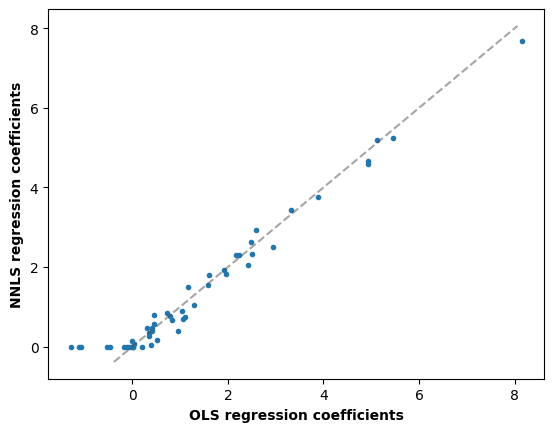

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

## Summary
In this lab, we learned about non-negative least squares regression and how it differs from classic linear regression. We used scikit-learn to implement this algorithm and compared it to classic linear regression by generating random data and splitting it into a train set and a test set. We then fit both models to the data, predicted the values for the test set, and calculated the R2 score. Finally, we compared the regression coefficients between the two models and observed that non-negative least squares regression yields sparse results.